In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [6]:
from sklearn import datasets
from sklearn import metrics

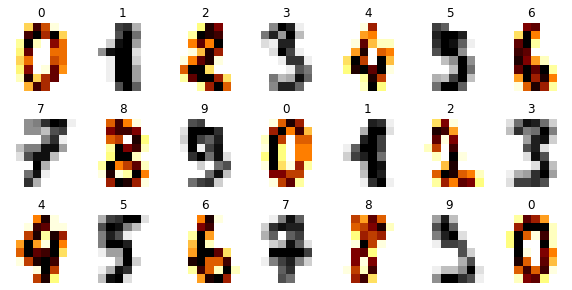

In [7]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [8]:
X_ext = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

In [9]:
X_ext

array([[ 1.,  0.,  0., ..., 13.,  4.,  0.],
       [ 1.,  0.,  0., ...,  3.,  0.,  0.],
       [ 1.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ..., 16.,  2.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.]])

In [25]:

eta = 0.001
C = 1.0

In [ ]:
Так, про циклы в фите.
# 1. Берем вектор весов w умножаем на X[i от всех семплов], получаем число 
# 2. умножаем его на y[i], получаем число. 
# 3. Берем экспоненту то да се, 
# 4. умножаем полученное число на результат векторного перемножения y[i] и x[i], 
# 5. получаем вектор из 65 элементов. 
# 6. Прогоняем цикл 1437 раз,
# 7. полученные вектора сумми

In [10]:
num_features = X_ext.shape[1]
weights_ = np.zeros(num_features) 

In [ ]:
(1/X_ext.shape[0])*(np.log(1+np.exp(-(weights@X_ext.T)*y))).sum()+((np.linalg.norm(weights)**2)/(2*self.C))

In [26]:
*np.log(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()+((np.linalg.norm(weights_)**2)/(2*C))

0.6931471805599453

In [43]:
lin = weights_@X_ext.T

result = 0
for i in range(X_ext.shape[0]):
    row = np.log(1+np.exp(-lin[i]*y[i]))
    result += row
result = (1/X_ext.shape[0])*result + ((np.linalg.norm(weights_)**2)/(2*C))
result

0.6931471805599195

In [11]:
#dtype('float64')
result = np.zeros((65,))
result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
i = 0
y[1]*X_ext[1]

array([ 1.,  0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15.,
       14., 12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,
        5.,  8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,
        8.,  0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,
        4.,  6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.])

In [13]:
(1-(1/np.exp(-(weights_@X_ext[i])*y_train[i])))

0.0

In [19]:
delta = np.zeros((65,))
for i in range(X_ext.shape[0]): 
    sample = y[i]*X_ext[i]*(1-(1/(1+np.exp(-(weights_@X_ext[i])*y_train[i]))))
    delta = np.vstack([result, sample])
delta = (1/X_ext.shape[0])*delta.sum(axis=0) - (eta/C)*weights_
delta.shape

(65,)

In [215]:
((eta/C)*weights_).shape

(65,)

In [218]:
C

1.0

In [ ]:
y_train*X_ext

In [ ]:
s = 3.1000e-06

In [ ]:
ss = 6.92307692e-05

In [ ]:
s/ss

In [ ]:
ss/s

In [ ]:
(eta/num_features)

In [ ]:
len((eta/C)*weights_)

In [ ]:
1 - (1/(1+np.exp(-(weights_*X_ext).sum()))

In [ ]:
(y_train@X_ext)*(eta/num_features)

In [ ]:
delta = np.linalg.norm(next - weights_)

In [ ]:
next.shape

In [ ]:
next

In [ ]:
delta

In [ ]:
next

In [ ]:
weights_

In [ ]:
np.zeros((X.shape[1],1))

In [ ]:
def get_sigmoid(X, weights):
    def sigm(z):
        return 1 / (1 + exp(-z))
    lin = X@weights
    return np.fromiter(map(sigm, lin), dtype='float')

In [ ]:
delta = (1/num_features)*((get_sigmoid(X_ext, weights_)@X_ext - y))

In [ ]:
(get_sigmoid(X_ext, weights_)@X_ext - y_train)

In [ ]:
((1/num_features)*(X_ext@get_sigmoid(X_ext, weights_)-y_train))

In [ ]:
(get_sigmoid(X_ext, weights_).T@X_ext).shape

In [ ]:
y_train.shape

In [ ]:
y_hat = [0.95, 0.7, 00.1, 0.33]
[1 if e>0.5 else -1 for e in y_hat]

In [ ]:
1 - (1/(1+exp(-(weights_*X_ext).sum())))

In [ ]:
(np.log(1+exp(-(weights_*X_ext).sum()))+(np.linalg.norm(weights_)**2)/(2*C))/(X_ext.shape[1])

In [43]:
#(weights_*X_ext)*y_train
a = weights_*X_ext
a.T@y_train


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
y_train

array([-1, -1, -1, ..., -1,  1,  1], dtype=int32)

In [ ]:
np.log(1+exp(-(weights_*X_ext).sum()))

In [ ]:
np.linalg.norm(weights_)**2

In [ ]:
(weights_).shape

In [ ]:
X_ext.shape

In [46]:
(np.inner(weights_, X_ext) * y_train).sum()

0.0

In [61]:
(1/X_ext.shape[0])*np.log(1+np.exp(-((np.inner(weights_, X_ext[0,:]) * y_train))).sum())+\
                ((np.linalg.norm(weights_)**2)/(2*C))/X.shape[1]


0.005059852845011129

In [58]:
np.log(1+np.exp(-((np.inner(weights_, X_ext[0,:]) * y_train)))).shape

(1437,)

In [66]:
((weights_@X_ext[0,:])*y_train).shape

(1437,)

In [57]:
.shape

(65,)

In [70]:
(X_ext@weights_)*y_train

array([-0., -0., -0., ..., -0.,  0.,  0.])

In [71]:
y_train.shape


(1437,)

In [80]:
X_ext[0,:].shape

(65,)

In [82]:
X_ext[0].shape

(65,)

In [84]:
weights_.shape

(65,)

In [93]:
weights_@X_ext[0]*y_train[0]

-0.0

In [91]:
(y_train[0]*X_ext[0]*(0.5)).shape

(65,)

In [105]:
np.log(-(weights_@X_ext.T*y_train))

C:\Users\User\AppData\Local\Temp\ipykernel_24116\11077261.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(-(weights_@X_ext.T*y_train))


array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

In [ ]:
# (1/X_ext.shape[0])*np.log(1+np.exp(-((self.weights_@X_ext.T)*y_train)))+\
#                 ((np.linalg.norm(weights)**2)/(2*self.C))/X.shape[1]

In [128]:
np.log(1+(np.exp(-((weights_@X_ext.T)*y_train)))).sum()/1437

0.6931471805599453

In [159]:
w = weights_
w = 0.0001

In [157]:
np.log(1+(np.exp(-((w@X_ext.T)*y_train)))).sum()/1437

0.6934355105644995

In [161]:
np.log(1+np.exp(-(weights_@X_ext.T)*y_train)).sum()

996.4668286811857

array([1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05])

In [182]:
(y_train@X_ext)*(1 - (1/(1+np.exp(-(weights_@X_ext.T)*y_train))).sum())

array([-6.45661235e+03, -0.00000000e+00, -8.60881647e+04, -1.12918976e+06,
       -4.56267273e+05, -1.00507932e+06, -2.79930015e+06, -1.23249556e+06,
       -1.16219022e+05,  1.43480274e+03, -3.48657067e+05, -5.19398593e+05,
        9.01056123e+05, -7.46097427e+05, -2.07185516e+06, -8.71642667e+05,
       -5.30877015e+04, -7.17401372e+02,  2.36742453e+04,  1.49362966e+06,
        5.40203233e+05, -1.80498185e+06, -8.56577238e+05,  1.73611132e+05,
        1.07610206e+04, -0.00000000e+00,  4.56984674e+05,  1.17797305e+06,
       -2.03239809e+06, -2.78495213e+06, -1.03521018e+06,  3.51526672e+05,
        2.15220412e+03, -0.00000000e+00,  1.39821527e+06,  2.16798695e+06,
        9.18273756e+04, -7.66184665e+05, -8.68055660e+05,  1.68589322e+05,
       -0.00000000e+00,  1.07610206e+04,  1.10121111e+06,  4.20468944e+06,
        1.73826352e+06, -2.14503010e+05,  2.55394888e+05,  3.68744305e+05,
        2.72612521e+04,  9.32621784e+03,  1.94415772e+05,  2.29424959e+06,
        1.04955821e+06,  

In [183]:
(y_train@X_ext)*(1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum())

array([ 8.99686985e+00,  0.00000000e+00,  1.19958265e+02,  1.57345257e+03,
        6.35778803e+02,  1.40051274e+03,  3.90064291e+03,  1.71740249e+03,
        1.61943657e+02, -1.99930441e+00,  4.85830972e+02,  7.23748197e+02,
       -1.25556317e+03,  1.03963829e+03,  2.88699557e+03,  1.21457743e+03,
        7.39742632e+01,  9.99652206e-01, -3.29885228e+01, -2.08127589e+03,
       -7.52738111e+02,  2.51512495e+03,  1.19358473e+03, -2.41915834e+02,
       -1.49947831e+01,  0.00000000e+00, -6.36778455e+02, -1.64142892e+03,
        2.83201470e+03,  3.88064986e+03,  1.44249813e+03, -4.89829581e+02,
       -2.99895662e+00,  0.00000000e+00, -1.94832215e+03, -3.02094897e+03,
       -1.27955482e+02,  1.06762856e+03,  1.20957917e+03, -2.34918268e+02,
        0.00000000e+00, -1.49947831e+01, -1.53446614e+03, -5.85896158e+03,
       -2.42215729e+03,  2.98896010e+02, -3.55876185e+02, -5.13821234e+02,
       -3.79867838e+01, -1.29954787e+01, -2.70905748e+02, -3.19688775e+03,
       -1.46249118e+03, -

In [12]:
X_ext

array([[ 1.,  0.,  0., ..., 13.,  4.,  0.],
       [ 1.,  0.,  0., ...,  3.,  0.,  0.],
       [ 1.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ..., 16.,  2.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.]])

In [13]:
X_train = np.array([
[160,50],
[160,70],
[170,60],
[170,80],
[180,70],
[180,90],
[190,80],
[190,100]])

In [14]:
y_train = [-1,1,-1,1,-1,1,-1,1]

In [15]:
X_ext = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

In [17]:
X_ext

array([[  1., 160.,  50.],
       [  1., 160.,  70.],
       [  1., 170.,  60.],
       [  1., 170.,  80.],
       [  1., 180.,  70.],
       [  1., 180.,  90.],
       [  1., 190.,  80.],
       [  1., 190., 100.]])

In [18]:
num_features = X_ext.shape[1]

In [20]:
weights_ = np.zeros(num_features)

In [23]:
delta = (1/X_ext.shape[0])*(y_train@X_ext)*\
                (1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()) - ((eta/C)*weights_)

In [24]:
delta

array([0.   , 0.   , 9.375])

In [25]:
X_test = [[160,100], [170,100], [180,50], [190,50]]
y_test = [1,1,-1,-1]

In [26]:
delta = - delta

In [29]:
weights_ -= eta * delta
weights_

array([0.     , 0.     , 0.01875])

In [31]:
(1/X_ext.shape[0])*np.log(1+np.exp(-(weights_@X_ext.T)*y_train)).sum()+\
                ((np.linalg.norm(weights_)**2)/(2*C))/X.shape[1]

0.8348185030602405

In [32]:
np.linalg.norm(delta)

9.375

In [33]:
delta = (1/X_ext.shape[0])*(y_train@X_ext)*\
                (1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()) - ((eta/C)*weights_)

In [34]:
delta

array([0.        , 0.        , 9.55870534])

In [35]:
delta = - delta
weights_ -= eta * delta
weights_

array([0.        , 0.        , 0.02830871])

In [36]:
(1/X_ext.shape[0])*np.log(1+np.exp(-(weights_@X_ext.T)*y_train)).sum()+\
                ((np.linalg.norm(weights_)**2)/(2*C))/X.shape[1]

1.0417810826121863

In [46]:
def get_sigmoid(X, weights):
    def sigm(z):
        return 1 / (1 + np.exp(-z))
    lin = X@weights
    return np.fromiter(map(sigm, lin), dtype='float')

In [47]:
def predict_proba(X, weights_):
    """Predict positive class probabilities.

    Args:
        X: numpy array of shape (n_samples, n_features)
    Returns:
        y: numpy array of shape (n_samples,)
            Vector containing positive class probabilities.
    """
    return get_sigmoid(X_ext, weights_)

In [48]:
[1 if e>0.5 else -1 for e in predict_proba(X_test, weights_)]

[1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
delta = (1/X_ext.shape[0])*(y_train@X_ext)*\
                (1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()) - ((eta/C)*weights_)

In [50]:
delta

array([0.        , 0.        , 9.71299206])

In [51]:
delta = - delta
weights_ -= eta * delta
weights_

array([0.       , 0.       , 0.0380217])

In [124]:
delta = (1/X_ext.shape[0])*(y_train@X_ext)*\
                (1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()) - ((eta/C)*weights_)
delta = - delta
weights_ -= eta * delta
weights_

C:\Users\boobo\AppData\Local\Temp/ipykernel_1536/4180924997.py:2: RuntimeWarning: overflow encountered in exp
  (1 - 1/(1+np.exp(-((weights_@X_ext.T)*y_train))).sum()) - ((eta/C)*weights_)


array([ 0.,  0., 10.])

In [122]:
(1/X_ext.shape[0])*np.log(1+np.exp(-(weights_@X_ext.T)*y_train)).sum()+\
                ((np.linalg.norm(weights_)**2)/(2*C))/X.shape[1]

C:\Users\boobo\AppData\Local\Temp/ipykernel_1536/2689590769.py:1: RuntimeWarning: overflow encountered in exp
  (1/X_ext.shape[0])*np.log(1+np.exp(-(weights_@X_ext.T)*y_train)).sum()+\


inf

In [116]:
eta = 1

In [123]:
[1 if e>0.5 else -1 for e in predict_proba(X_test, weights_)]

[1, 1, 1, 1, 1, 1, 1, 1]

In [44]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

NameError: name 'fit_evaluate' is not defined

In [62]:
a = [2,3,1]

In [63]:
b = a.copy()

In [64]:
b.sort()

In [65]:
a

[2, 3, 1]

In [66]:
b

[1, 2, 3]

In [68]:
r = np.random.RandomState(seed=42)

In [70]:
weight_threshold = 1.0 / (2 * 65)

In [71]:
r.uniform(low=-weight_threshold, high=weight_threshold, size=num_features)

array([-1.93015202e-03,  6.93406625e-03,  3.56913757e-03,  1.51782283e-03,
       -5.29202092e-03, -5.29239199e-03, -6.79871366e-03,  5.63347917e-03,
        1.55561557e-03,  3.20111658e-03, -7.37562316e-03,  7.22938234e-03,
        5.11450217e-03, -4.42555214e-03, -4.89500050e-03, -4.87069985e-03,
       -3.01165780e-03,  3.80868179e-04, -1.04699971e-03, -3.21185938e-03,
        1.72081376e-03, -5.54624830e-03, -3.19777464e-03, -2.05597164e-03,
       -6.75846397e-04,  4.38732248e-03, -4.62040335e-03,  2.18991360e-04,
        1.42176260e-03, -6.97768596e-03,  1.65453618e-03, -5.06885964e-03,
       -6.69151395e-03,  6.90593134e-03,  7.16356974e-03,  4.74457459e-03,
       -3.00594201e-03, -6.18965978e-03,  2.83435425e-03, -9.20730866e-04,
       -5.81479639e-03, -7.42013829e-05, -7.16325352e-03,  6.29723696e-03,
       -3.71107721e-03,  2.50034284e-03, -2.89675268e-03,  3.08738787e-04,
        7.18619682e-04, -4.84839299e-03,  7.22437889e-03,  4.23281267e-03,
        6.76152218e-03,  